In [79]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [80]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [81]:
train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [82]:
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [83]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [84]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [85]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

# glob -> how many folders are present

In [86]:
folders

['Datasets/train\\audi',
 'Datasets/train\\bugatti',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes',
 'Datasets/train\\porsche']

In [40]:
#layers
x = Flatten()(resnet.output)

In [50]:
#prediction = Dense(len(folders), activation='softmax')(x)
prediction = Dense(6, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [51]:
# view the structure of the model
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [52]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [53]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [54]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 140 images belonging to 6 classes.


In [55]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 131 images belonging to 6 classes.


In [59]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\OMSAI~1\AppData\Local\Temp/ipykernel_133960/4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
5/5 [==============================] - 35s 8s/step - loss: 0.1743 - accuracy: 0.9786 - val_loss: 1.8178 - val_accuracy: 0.4427
Epoch 2/50
5/5 [==============================] - 35s 8s/step - loss: 0.2121 - accuracy: 0.9500 - val_loss: 1.7529 - val_accuracy: 0.4809
Epoch 3/50
5/5 [==============================] - 34s 7s/step - loss: 0.1533 - accuracy: 0.9786 - val_loss: 2.2188 - val_accuracy: 0.4275
Epoch 4/50
5/5 [==============================] - 30s 6s/step - loss: 0.3170 - accuracy: 0.8786 - val_loss: 1.9119 - val_accuracy: 0.4580
Epoch 5/50
5/5 [==============================] - 31s 7s/step - loss: 0.2376 - accuracy: 0.9214 - val_loss: 1.9649 - val_accuracy: 0.4580
Epoch 6/50
5/5 [==============================] - 30s 7s/step - loss: 0.3797 - accuracy: 0.8500 - val_loss: 1.9187 - val_accuracy: 0.4351
Epoch 7/50
5/5 [==============================] - 30s 7s/step - loss: 0.2989 - accuracy: 0.8929 - val_loss: 2.4181 - val_accuracy: 0.4046
Epoch 8/50
5/5 [==================

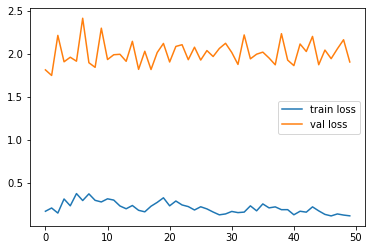

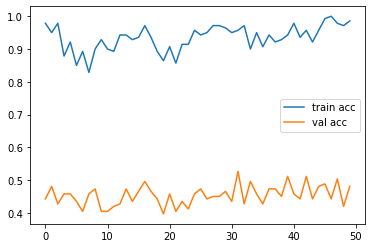

<Figure size 432x288 with 0 Axes>

In [60]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [61]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [62]:
y_pred = model.predict(test_set)

In [63]:
y_pred

array([[0.00000000e+00, 4.17257547e-01, 1.62699944e-04, 6.25013783e-08,
        5.82579017e-01, 6.69738313e-07],
       [0.00000000e+00, 1.60817261e-04, 1.29779149e-02, 9.27607417e-01,
        5.91404662e-02, 1.13430200e-04],
       [0.00000000e+00, 5.46107925e-02, 3.78009081e-01, 3.75514060e-01,
        7.20392391e-02, 1.19826853e-01],
       [0.00000000e+00, 8.31559300e-02, 2.70711988e-01, 1.92743987e-02,
        5.99872649e-01, 2.69850418e-02],
       [0.00000000e+00, 7.69826770e-01, 1.45916104e-01, 3.58188301e-02,
        4.83369119e-02, 1.01371566e-04],
       [0.00000000e+00, 8.00790265e-03, 4.32737824e-03, 6.90262459e-05,
        9.87580299e-01, 1.53637538e-05],
       [4.72238143e-38, 1.10945255e-01, 6.31478488e-01, 8.90956819e-02,
        1.66257828e-01, 2.22278410e-03],
       [0.00000000e+00, 4.35050189e-01, 2.92559911e-04, 4.18799209e-05,
        5.48331499e-01, 1.62838455e-02],
       [0.00000000e+00, 1.06803316e-04, 6.32848125e-04, 1.81661397e-02,
        9.81094241e-01, 

In [64]:
y_pred = np.argmax(y_pred, axis=1)

In [65]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [66]:
model=load_model('model_resnet50.h5')

In [77]:
img_data

array([[[[-103.93116 , -116.779   , -123.68    ],
         [-103.93116 , -116.779   , -123.68    ],
         [-103.92724 , -116.77508 , -123.67608 ],
         ...,
         [-103.93116 , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ]],

        [[-103.93116 , -116.779   , -123.68    ],
         [-103.92724 , -116.77508 , -123.67608 ],
         [-103.92724 , -116.77508 , -123.67608 ],
         ...,
         [-103.92724 , -116.77508 , -123.67608 ],
         [-103.939   , -116.779   , -123.68    ],
         [-103.93508 , -116.77508 , -123.67608 ]],

        [[-103.93116 , -116.779   , -123.68    ],
         [-103.92724 , -116.77508 , -123.67608 ],
         [-103.92724 , -116.77508 , -123.67608 ],
         ...,
         [-103.92724 , -116.77508 , -123.67608 ],
         [-103.93116 , -116.779   , -123.68    ],
         [-103.92724 , -116.77508 , -123.67608 ]],

        ...,

        [[-103.22136 , -116.05351 , -1

In [68]:
img=image.load_img('Datasets/test/bugatti/11.jpg',target_size=(224,224))

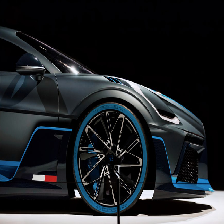

In [69]:
img

In [70]:
x=image.img_to_array(img)
x

array([[[  0.,   0.,   2.],
        [  0.,   0.,   2.],
        [  1.,   1.,   3.],
        ...,
        [  0.,   0.,   2.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   2.],
        [  1.,   1.,   3.],
        [  1.,   1.,   3.],
        ...,
        [  1.,   1.,   3.],
        [  0.,   0.,   0.],
        [  1.,   1.,   1.]],

       [[  0.,   0.,   2.],
        [  1.,   1.,   3.],
        [  1.,   1.,   3.],
        ...,
        [  1.,   1.,   3.],
        [  0.,   0.,   2.],
        [  1.,   1.,   3.]],

       ...,

       [[196., 185., 183.],
        [196., 186., 184.],
        [196., 188., 185.],
        ...,
        [225., 223., 226.],
        [224., 222., 227.],
        [224., 222., 227.]],

       [[191., 180., 176.],
        [191., 181., 179.],
        [190., 182., 179.],
        ...,
        [222., 220., 223.],
        [223., 221., 222.],
        [222., 220., 221.]],

       [[186., 175., 171.],
        [186., 176., 174.],
        [186., 1

In [71]:
x.shape


(224, 224, 3)

In [72]:
x=x/255

In [73]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [74]:
model.predict(img_data)

array([[6.9817457e-15, 7.1662837e-01, 2.8327534e-01, 6.4453317e-08,
        9.6208372e-05, 2.2939790e-09]], dtype=float32)

In [75]:
a=np.argmax(model.predict(img_data), axis=1)

In [76]:
a==1

array([ True])